**URL Heroku**
https://rahmad-gunawan-ftds-013-p0m1.herokuapp.com/
## **Introduction**
Kita Perkenalan dulu ya gaess :)

**Milestone 1**
Rahmad Gunawan
FTDS-Batch 013

**Library yang digunakan adalah Numpy,Pandas,Scipy,Plotly,Seaborn**

In [1]:
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

### **Introduction**

**Description :** 
Data Berisikan Database epa_historical_air_quality yang bersumber dari bigquery-public-data pada Google Cloud Platform, dan terdiri atas beberapa kolom yaitu "year, state_name, parameter_name,dan arithmetic_mean_average". Dengan rentang tahun data diambil adalah 1980 - 2022, dengan memilih hanya beberapa parameter kualitas udara yaitu (PM2.5 and PM10), Ozone (O3), Nitrogen Dioxide (NO2), Sulfur Dioxide (SO2) and Carbon Monoxide (CO) emissions.

**Sekilas Info (Sekilas tentang permasalahannya)**
Kementerian Lingkungan Hidup Amerika Serikat ingin membuat regulasi mengenai emisi industri dan kendaraan bermotor yang kini sangat merusak kualitas udara di negara tersebut. Namun untuk membuat regulasi tersebut, harus diketahui kondisi kualitas udara saat ini di berbagai negara bagian agar mudah menentukan negara bagian mana saja yang harus diterapkan regulasi tersebut terlebih dahulu. Gunakan dataset epa_historical_air_quality di Google Cloud Platform BigQuery.

**jadi disini kita diminta untuk memberi informasi/insight terkait kualitas udara dinegara amerika serikat, mau ambil berdasarkan negara bagian boleh, dalam kasus ini, kita akan ambil keseluruhan negara amerika okeee**

**Objective :**
Menganalisa dana memvisualisasi data tersebut menggunakan tipe visualisasi (batang, garis, dsb) dan library (matplotlib, pyplot, seaborn, dsb) apapun dan untuk juga kita akan meng-analisanya menggunakan Statistik Deskriptif, serta memberikan insight kepada pemerintah Amerika mengenai kondisi Air Quality dinegara tersebut, Output terakhir dari milestone ini adalah dashboard data visualisasi menggunakan streamlit.

## **Identifikasi Masalah**

**Topik Permasalahan** # jadi apa sebenarnya yang dipermasalahkan ?


Seperti kita ketahui permasalahan kualitas udara merupakan salah satu permasalahan yang sedang banyak dibicarakan oleh masyarakat kota, permasalahan ini tentunya tidak terlepas dari permasalahan-permasalahan yang ada diperkotaan, terutama di kota-kota besar, selain itu Upaya peningkatan kualitas udara perkotaan saat ini telah menjadi bagian mitigasi perubahan iklim. oleh karena itu permasalahan terkait kualitas udara perlu diselesaikan. ada beberapa tahapan dalam penyelesaian pada studi kasus ini
**Pertama** Kita akan mengidentifikasi **negara bagian mana (states) yang memiliki permasalahan kualitas udara terburuk** berdasarkan beberapa parameter **"The Air Quality Index"**, dalam kasus ini **hanya terdapat 6 kategorikal kualitas udara, yaitu : (PM2.5 and PM10), Ozone (O3), Nitrogen Dioxide (NO2), Sulfur Dioxide (SO2) and Carbon Monoxide (CO) emissions**
mengapa hanya keenam jenis parameter tersebut ? hal dikarenakan kelima parameter tersebut merupakan jenis permasalahan kualitas udara yang paling sering dialami negara-negara di dunia, selain itu,**Data yang tersedia** lebih lengkap jika dibandingkan dengan parameter-parameter lainnya. selain itu kita juga akan mencoba mengetahui apakah terdapat pengaruh dampak kejadian covid-19 terhadap kualitas udara, yaitu dengan membandingkan data kejadian setelah covid 2019-2022 dan dengan data dalam rentang tahun 2014-2018.

**Kita akan membandingkan antara kualitas udara setelah covid dan sebelum covid, dengan membandingkanya berdasarkan rentang waktu 5 tahun terakhir**. setelah mengetahui perbedaan antara kualitas udara pasca dan pra covid, kita akan memilih salah satu negara bagian untuk dianalisa lebih lanjut untuk mengetahui apakah dampak kejadian covid sangat berpengaruh terhadap peningkatan kualitas lingkungan, atau sebaliknya. dalam case ini kita akan mengambil studi kasus pada negara bagian yang paling menarik jika dilihat dari dampak perubahannya, dan akan menjawab beberapa pertanyaan berikut :

What is the current air quality in selected states?
How polluted is it?
Why is there unhealthy air quality ?
What chemicals are in ?
What is government doing to improve air quality?

**Metode Analisis** Metode analisis yang digunakan untuk studi case ini adalah menggunakan analisis statistik deskriptif untuk mengorganisasi dan merepresentasikan persebaran datanya,serta mengetahui datanya terdistribusi normal atau tidak, jika tidak maka perlu dilakukan cleaning terhadap tersebut sebelum dilakukan uji ketahap selanjutnya. dan juga kemudian divisualisasikan menggunakan grafik. setelah itu baru akan dilakukan analisa selanjutnya yaitu menggunakan statistik inferensial menggunakan uji hypothesis testing:T-test. setelah semua analisis dilakukan, maka akan terdapat informasi-informasi terkait kualitas udara yang ada dinegara amerika, yang kemudian agar mudah dimengerti, maka akan hasil olahan tersebut selain diberikan insight melalui teks/deskripsi, juga akan divisualisasikan. 

### **Working Area**
in this section contains the stages for : Data Loading, Missing Value, Manipulating Columns, Data Query/Filter

## **Data Loading & Queries**

In [2]:
# Dataset Description
# Pada graded challenge ini, data diakses menggunakan bigquery-public-data pada Google Cloud Big Query.
# Buka Google Cloud Platform, masuk ke BigQuery, lalu buka tab bigquery-public-data atau klik link berikut atau link berikut untuk langsung menuju ke dataset.

#### **1. Data Retrieve and Data Loading**
Dalam tahapan ini akan dimulai dengan mengambil **dataset epa_historical_air_quality.** bersumber dari  **bigquery-public-data,Google Cloud Platform** dengan melakukan **query** berdasarkan persyaratan tertentu yaitu **arithmetic_mean, city_name, state_name,county_name,units_of_measure,pollutant_standard,date_of_last_change, state_code, county_code**

**Data Retrieve**

Script dibawah digunakan untuk menquery data yang dibutuhkan untuk mengolah data Air Quality, berdasarkan ketentuan diatas

**Query SQL 1 == Berisikan Data Summary Air Quality dari Tahun 1980-2022**
**digunakan untuk mengetahui secara umum kualitas tingkat udara disetiap states yang ada dinegara amerika**

SELECT  parameter_name, year, arithmetic_mean, city_name, state_name,county_name,units_of_measure,pollutant_standard, state_code, county_code
FROM `bigquery-public-data.epa_historical_air_quality.air_quality_annual_summary` 
WHERE
      state_name ="Arizona" AND 
      state_name IS NOT NULL AND
      date_of_last_change IS NOT NULL AND
      year >= 2015 AND
      arithmetic_mean IS NOT NULL AND
      parameter_name IS NOT NULL AND
      parameter_name IN ('PM2.5 - Local Conditions' ,'PM10 Total 0-10um STP' , 'Nitrogen dioxide (NO2)' , 'Ozone' ,'Carbon monoxide');

**Menyimpan Data Big Query**

Data yang sudah diquery kemudian disimpan dengan nama file **'Data.csv'** Untuk untuk kemudian data tersebut diload

**Loading Data**

In [3]:
# Loading Data 
# Mengidentifikasi Kualitas udara pada setiap negara bagian
data = pd.read_csv('Data.csv')
pd.set_option("display.max.columns",None)
pd.set_option('display.max_row', 10)
data

,year,state_name,parameter_name,arithmetic_mean_average
0,2008,Country Of Mexico,PM10 Total 0-10um STP,114.807491
1,2015,Virgin Islands,PM10 Total 0-10um STP,88.882353
2,2009,Country Of Mexico,PM10 Total 0-10um STP,86.288976
3,2007,Country Of Mexico,PM10 Total 0-10um STP,85.451785
4,2006,Country Of Mexico,PM10 Total 0-10um STP,84.711448
...,...,...,...,...
11880,1995,Nevada,Sulfur dioxide,0.005455
11881,1993,Wyoming,Sulfur dioxide,0.001031
11882,2014,Puerto Rico,Nitrogen dioxide (NO2),0.000000
11883,1992,Nevada,Sulfur dioxide,0.000000


*Terdapat 11885 row dan terdiri 4 columns*

**Menghapus beberapa states yang bukan states dari USA dan tidak terdapat kode id states untuk visualisasi peta, atau yang jaraknya sangat jauh dari states lain di USA**

In [4]:
subsetDataFrame = data[data['state_name'].isin(['Country Of Mexico', 'Canada','Guam','Virgin Islands','Puerto Rico'])]
subsetDataFrame

,year,state_name,parameter_name,arithmetic_mean_average
0,2008,Country Of Mexico,PM10 Total 0-10um STP,114.807491
1,2015,Virgin Islands,PM10 Total 0-10um STP,88.882353
2,2009,Country Of Mexico,PM10 Total 0-10um STP,86.288976
3,2007,Country Of Mexico,PM10 Total 0-10um STP,85.451785
4,2006,Country Of Mexico,PM10 Total 0-10um STP,84.711448
...,...,...,...,...
11874,1982,Puerto Rico,Ozone,0.010089
11876,1983,Puerto Rico,Ozone,0.007706
11877,2018,Puerto Rico,Ozone,0.006505
11879,1993,Puerto Rico,Ozone,0.006164


In [5]:
data = data.drop(data.loc[data['state_name'].isin(['Country Of Mexico', 'Canada','Guam','Virgin Islands','Puerto Rico'])].index)
data

,year,state_name,parameter_name,arithmetic_mean_average
21,1984,Iowa,PM10 Total 0-10um STP,68.000000
22,1983,Iowa,PM10 Total 0-10um STP,67.181818
29,1985,Washington,PM10 Total 0-10um STP,62.251026
30,1985,Oregon,PM10 Total 0-10um STP,62.151351
35,1985,Arizona,PM10 Total 0-10um STP,56.210321
...,...,...,...,...
11878,1992,Wyoming,Sulfur dioxide,0.006383
11880,1995,Nevada,Sulfur dioxide,0.005455
11881,1993,Wyoming,Sulfur dioxide,0.001031
11883,1992,Nevada,Sulfur dioxide,0.000000


**Berdasarkan informasi diatas data awal yang diperolah yaitu 11637 rows dan terdiri atas 4 columns dan kemudian setelah dilakukan seleksi data, maka data tersebut berubah menjadi 11431 rows**

In [6]:
data.sample(5) #cek

,year,state_name,parameter_name,arithmetic_mean_average
7075,1985,Connecticut,Carbon monoxide,1.825512
11409,1984,Michigan,Ozone,0.040287
8141,2001,Louisiana,Carbon monoxide,0.793226
10938,2017,Indiana,Ozone,0.043656
10800,1996,Massachusetts,Ozone,0.044700


In [7]:
data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
year,11431.000000,2002.449217,11.993824,1980.000000,1992.000000,2003.000000,2013.000000,2022.000000
arithmetic_mean_average,11431.000000,9.559720,10.659437,-0.017849,0.359260,6.318774,16.168984,68.000000


## **Data Cleaning**

#### **Data Checking / Missing Value & Data Cleaning,**

Let's proceed to do a Data cleaning, meaning the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within the dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. If data is incorrect, outcomes and algorithms are unreliable.

Missing Data can also refer to as NA(Not Available) values in pandas. 
Pandas missing data is represented by two value:
    None: None is a Python singleton object that is often used for missing data in Python code.
    NaN : NaN (an acronym for Not a Number), is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation

Checking for missing values using isnull() and notnull()

**Data Checking**

In [8]:
data.isnull().sum() #digunakan untuk mengecek missing value pada masing-masing column

year                       0
state_name                 0
parameter_name             0
arithmetic_mean_average    0
dtype: int64

**Tidak Terdapat Missing Value Pada data yang sudah load, sehingga kita dapat melanjutkan ketahapan selanjutnya yaitu mencoba mengidentifikasi apakah terdapat non standar missing value pada setiap kolom**

In [9]:
data.info() # untuk mengetahui jumlah/count dari masing-masing column dan memastikan bahwa tidak terdapat missing value/non-null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11431 entries, 21 to 11884
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     11431 non-null  int64  
 1   state_name               11431 non-null  object 
 2   parameter_name           11431 non-null  object 
 3   arithmetic_mean_average  11431 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 446.5+ KB


In [10]:
data['state_name'].unique() #cek sample non standar missing value

array(['Iowa', 'Washington', 'Oregon', 'Arizona', 'California',
       'District Of Columbia', 'Nevada', 'Maryland', 'Utah', 'Alaska',
       'Montana', 'Virginia', 'Illinois', 'Colorado', 'New Mexico',
       'Delaware', 'Alabama', 'Rhode Island', 'Wyoming', 'Georgia',
       'Texas', 'West Virginia', 'Idaho', 'Tennessee', 'Connecticut',
       'New Jersey', 'Indiana', 'Kansas', 'New York', 'Kentucky',
       'Massachusetts', 'Ohio', 'Nebraska', 'South Carolina',
       'Pennsylvania', 'Minnesota', 'North Carolina', 'New Hampshire',
       'Missouri', 'Louisiana', 'Mississippi', 'Florida', 'Wisconsin',
       'Arkansas', 'South Dakota', 'Maine', 'Michigan', 'Oklahoma',
       'Vermont', 'Hawaii', 'North Dakota'], dtype=object)

In [11]:
data['year'].unique()

array([1984, 1983, 1985, 1986, 1980, 1981, 1987, 1988, 2006, 2007, 1989,
       1995, 1982, 2022, 1998, 1990, 2008, 2012, 1999, 1997, 1991, 2017,
       2001, 2000, 2003, 2011, 1993, 1992, 2009, 2005, 1996, 1994, 2014,
       2018, 2002, 2016, 2020, 2013, 2021, 2010, 2004, 2015, 2019],
      dtype=int64)

In [12]:
data.head(5)

,year,state_name,parameter_name,arithmetic_mean_average
21,1984,Iowa,PM10 Total 0-10um STP,68.000000
22,1983,Iowa,PM10 Total 0-10um STP,67.181818
29,1985,Washington,PM10 Total 0-10um STP,62.251026
30,1985,Oregon,PM10 Total 0-10um STP,62.151351
35,1985,Arizona,PM10 Total 0-10um STP,56.210321


**Tidak ditemukan Missing Value pada data kedua, maka kedua data tersebut sudah dapat diolah**

## **Data Exploration**

**Menambahkan coloumn yang berisikan ID_Name dari setiap State**

hal dilakukan untuk mempermudah dalam visualisasi menggunakan peta

In [13]:
state_codes = {
    'District Of Columbia' : 'DC','Mississippi': 'MS', 'Oklahoma': 'OK', 
    'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 
    'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 
    'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 
    'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 
    'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 
    'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 
    'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI',
    'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 
    'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 
    'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 
    'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 
    'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 
    'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 
    'Nevada': 'NV', 'Maine': 'ME'}
    
name = [data]
for i in name:
    i['state_code'] = i['state_name'].apply(lambda x : state_codes[x])

In [14]:
data

,year,state_name,parameter_name,arithmetic_mean_average,state_code
21,1984,Iowa,PM10 Total 0-10um STP,68.000000,IA
22,1983,Iowa,PM10 Total 0-10um STP,67.181818,IA
29,1985,Washington,PM10 Total 0-10um STP,62.251026,WA
30,1985,Oregon,PM10 Total 0-10um STP,62.151351,OR
35,1985,Arizona,PM10 Total 0-10um STP,56.210321,AZ
...,...,...,...,...,...
11878,1992,Wyoming,Sulfur dioxide,0.006383,WY
11880,1995,Nevada,Sulfur dioxide,0.005455,NV
11881,1993,Wyoming,Sulfur dioxide,0.001031,WY
11883,1992,Nevada,Sulfur dioxide,0.000000,NV


**Tahapan Awal Mengidentifikasi negara bagian mana dengan tingkat kualitas udara terburuk berdasarkan 6 jenis kualitas udara**

In [15]:
data['year'].describe()

count    11431.000000
mean      2002.449217
std         11.993824
min       1980.000000
25%       1992.000000
50%       2003.000000
75%       2013.000000
max       2022.000000
Name: year, dtype: float64

Berdasarkan data diatas didapatkan bahwa rentang tahun data diambil yaitu dari tahun 1980-2022

Pemisahan Data Berdasarkan Parameter Kualitas Udara : 
**'PM10 Total 0-10um STP', 'Nitrogen dioxide (NO2)','Sulfur dioxide', 
'PM2.5 - Local Conditions', 'Carbon monoxide','Ozone'**

In [16]:
PM2_5 = data[(data['parameter_name']=='PM2.5 - Local Conditions')].groupby(['state_name','parameter_name','state_code'])['arithmetic_mean_average'].mean().reset_index().sort_values(by='arithmetic_mean_average', ascending=False)
PM10 = data[(data['parameter_name']=='PM10 Total 0-10um STP')].groupby(['state_name','parameter_name','state_code'])['arithmetic_mean_average'].mean().reset_index().sort_values(by='arithmetic_mean_average', ascending=False)
NO2 = data[(data['parameter_name']=='Nitrogen dioxide (NO2)')].groupby(['state_name','parameter_name','state_code'])['arithmetic_mean_average'].mean().reset_index().sort_values(by='arithmetic_mean_average', ascending=False)
Ozone = data[(data['parameter_name']=='Ozone')].groupby(['state_name','parameter_name','state_code'])['arithmetic_mean_average'].mean().reset_index().sort_values(by='arithmetic_mean_average', ascending=False)
CO = data[(data['parameter_name']=='Carbon monoxide')].groupby(['state_name','parameter_name','state_code'])['arithmetic_mean_average'].mean().reset_index().sort_values(by='arithmetic_mean_average', ascending=False)
SO2 = data[(data['parameter_name']=='Sulfur dioxide')].groupby(['state_name','parameter_name','state_code'])['arithmetic_mean_average'].mean().reset_index().sort_values(by='arithmetic_mean_average', ascending=False)

In [17]:
PM2_5 # test dataframe

,state_name,parameter_name,state_code,arithmetic_mean_average
4,California,PM2.5 - Local Conditions,CA,12.733401
10,Georgia,PM2.5 - Local Conditions,GA,12.197166
35,Ohio,PM2.5 - Local Conditions,OH,12.119095
13,Illinois,PM2.5 - Local Conditions,IL,12.082817
14,Indiana,PM2.5 - Local Conditions,IN,11.940087
...,...,...,...,...
31,New Mexico,PM2.5 - Local Conditions,NM,6.716986
34,North Dakota,PM2.5 - Local Conditions,ND,5.953724
19,Maine,PM2.5 - Local Conditions,ME,5.832346
50,Wyoming,PM2.5 - Local Conditions,WY,5.738944


**Visualisasi Berdasarkan Nilai Rata-Rata Per Parameter Kualitas Udara, ditampilkan by states (Rentang Data 1980-2022)**

In [18]:
##untuk mempermudah proses visualisasi maka akan digunakan function loop 
name = [CO,Ozone,NO2,SO2,PM10,PM2_5]
label = ['CO','Ozone','NO2','SO2','PM10','PM2_5'] #label sesuai dengan jenis kualitas udara
a = 0
legend = ['Micrograms/Cubic Meter (25 C)','Micrograms/Cubic Meter (LC))','Parts per billion','Parts per million','Parts per million','Parts per billion'] 

for i in name:
    fig= go.Figure(data=go.Choropleth(
        locations=i['state_code'], # Spatial coordinates
        z = i['arithmetic_mean_average'].astype(float), # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = 'Reds',
        colorbar_title = f"{legend[a]}",
        text =i['state_name'],
    ))
    fig.update_layout(
        geo_scope='usa', # limite map scope to USA
    )
    fig.update_layout(height=600, width=800, title_text=f"1980 - 2022 Rata Rata Nilai:{label[a]}")
    a=a+1 
    fig.show()

## **Analisis dan Perhitungan**

**Mengidentifikasi Top 5 states dari masing-masing jenis polusi udara**
semakin tinggi nilai arithmetic_mean_averagenya semakin menunjukan seberapa besar tingkat polusi udara tersebut

In [19]:
PM2_5.head(5)

,state_name,parameter_name,state_code,arithmetic_mean_average
4,California,PM2.5 - Local Conditions,CA,12.733401
10,Georgia,PM2.5 - Local Conditions,GA,12.197166
35,Ohio,PM2.5 - Local Conditions,OH,12.119095
13,Illinois,PM2.5 - Local Conditions,IL,12.082817
14,Indiana,PM2.5 - Local Conditions,IN,11.940087


In [20]:
PM10.head(5)

,state_name,parameter_name,state_code,arithmetic_mean_average
2,Arizona,PM10 Total 0-10um STP,AZ,35.748220
4,California,PM10 Total 0-10um STP,CA,31.185273
31,New Mexico,PM10 Total 0-10um STP,NM,29.740925
27,Nebraska,PM10 Total 0-10um STP,NE,29.691853
13,Illinois,PM10 Total 0-10um STP,IL,29.650871


In [21]:
NO2.head(5)

,state_name,parameter_name,state_code,arithmetic_mean_average
30,New Jersey,Nitrogen dioxide (NO2),NJ,29.978588
8,District Of Columbia,Nitrogen dioxide (NO2),DC,29.349391
32,New York,Nitrogen dioxide (NO2),NY,29.137546
28,Nevada,Nitrogen dioxide (NO2),NV,28.237151
13,Illinois,Nitrogen dioxide (NO2),IL,27.731785


In [22]:
Ozone.head(5)

,state_name,parameter_name,state_code,arithmetic_mean_average
44,Utah,Ozone,UT,0.054852
5,Colorado,Ozone,CO,0.051142
20,Maryland,Ozone,MD,0.051077
33,North Carolina,Ozone,NC,0.050871
50,Wyoming,Ozone,WY,0.050155


In [23]:
CO.head(5)

,state_name,parameter_name,state_code,arithmetic_mean_average
1,Alaska,Carbon monoxide,AK,1.323837
12,Idaho,Carbon monoxide,ID,1.214153
37,Oregon,Carbon monoxide,OR,1.192092
47,Washington,Carbon monoxide,WA,1.188818
44,Utah,Carbon monoxide,UT,1.095653


In [24]:
SO2.head(5)

,state_name,parameter_name,state_code,arithmetic_mean_average
48,West Virginia,Sulfur dioxide,WV,14.513755
38,Pennsylvania,Sulfur dioxide,PA,11.026496
12,Idaho,Sulfur dioxide,ID,10.750916
11,Hawaii,Sulfur dioxide,HI,10.355230
35,Ohio,Sulfur dioxide,OH,9.739823


**Kesimpulan Eksplorasi Awal terkait tingkat polusi udara berdasarkan rentang waktu 1980-2022**

Berdasarkan data diatas, terdapat top 5 pada masing-masing parameter kualitas udara, dengan states terbanyak muncul adalah states **Illinois** serta states **California**, berikut adalah list top 5 kualitas udara berdasarkan nilai averagenya, pada rentang tahun 1980-2022.

PM2.5 = California, Georgia, Ohio, Illinois, Indiana
PM10 = Arizona,California,New Mexico,Nebraska, Illinois
NO2 = New Jersey, District Of Columbia, New York, Nevada, Illinois
Ozone = Utah, Colorado, Maryland, North Carolina, Wyoming	
CO = Alaska, Idaho, Oregon, Washington, Utah
SO2 = West Virginia	, Pennsylvania, Idaho, Hawaii, Ohio

**Mengidentifikasi Apakah Terdapat Pengaruh Kejadian Covid-19 Terhadap Tingkat Polusi Udara disetiap negara bagian**

Setelah mengetahui gambaran umum untuk keseluruhan negara bagian disetiap parameter kualitas udara, dengan rentang tahun 1980-2022, terdapat 2 nama states yang cukup menarik perhatian, yaitu states Illinois dan Californa, Tahapan selanjutnya adalah mengetahui apakah Terdapat Pengaruh Kejadian Covid-19 Terhadap Tingkat Polusi Udara disetiap negara bagian, dengan membandingkan data pada tahun 2019-2022 (pasca covid) dan data pada 5 tahun sebelum kejadian covid (2015-2018). dan kemudian akan memperlihatkan negara bagian masa yang mengalami pengaruh signifikan terhadap kejadian covid, yang kemudian akan dipertimbangkan untuk dipilih salah satu pada negara bagian tersebut. 

In [25]:
After_Covid = data[data['year']>=2019] # Query untuk After Covid
Before_Covid = data[(data['year']>=2015) &
                (data['year']<=2018)] # Query untuk Before Covid

In [26]:
After_Covid

,year,state_name,parameter_name,arithmetic_mean_average,state_code
76,2022,Texas,PM10 Total 0-10um STP,44.025137,TX
326,2020,Arizona,PM10 Total 0-10um STP,35.272091,AZ
425,2021,New Mexico,PM10 Total 0-10um STP,33.538533,NM
458,2021,Arizona,PM10 Total 0-10um STP,33.093637,AZ
509,2020,California,PM10 Total 0-10um STP,32.374773,CA
...,...,...,...,...,...
11785,2022,Washington,Ozone,0.028491,WA
11789,2021,Alaska,Ozone,0.028006,AK
11800,2021,Hawaii,Ozone,0.027281,HI
11807,2020,Hawaii,Ozone,0.026593,HI


In [27]:
Before_Covid

,year,state_name,parameter_name,arithmetic_mean_average,state_code
185,2017,Arizona,PM10 Total 0-10um STP,38.429644,AZ
275,2018,Arizona,PM10 Total 0-10um STP,36.231545,AZ
324,2016,Arizona,PM10 Total 0-10um STP,35.318109,AZ
816,2015,Arizona,PM10 Total 0-10um STP,28.951766,AZ
821,2016,California,PM10 Total 0-10um STP,28.902735,CA
...,...,...,...,...,...
11775,2015,Alaska,Ozone,0.029478,AK
11781,2015,Hawaii,Ozone,0.028887,HI
11787,2016,Alaska,Ozone,0.028181,AK
11788,2017,Alaska,Ozone,0.028027,AK


In [28]:
# Membuat Dataframe untuk Klasifikasi After Covid
AF_PM2_5 = After_Covid[(After_Covid['parameter_name']=='PM2.5 - Local Conditions')].groupby(['state_name','parameter_name','state_code'])['arithmetic_mean_average'].mean().reset_index().sort_values(by='arithmetic_mean_average', ascending=False)
AF_PM10 = After_Covid[(After_Covid['parameter_name']=='PM10 Total 0-10um STP')].groupby(['state_name','parameter_name','state_code'])['arithmetic_mean_average'].mean().reset_index().sort_values(by='arithmetic_mean_average', ascending=False)
AF_NO2 = After_Covid[(After_Covid['parameter_name']=='Nitrogen dioxide (NO2)')].groupby(['state_name','parameter_name','state_code'])['arithmetic_mean_average'].mean().reset_index().sort_values(by='arithmetic_mean_average', ascending=False)
AF_Ozone = After_Covid[(After_Covid['parameter_name']=='Ozone')].groupby(['state_name','parameter_name','state_code'])['arithmetic_mean_average'].mean().reset_index().sort_values(by='arithmetic_mean_average', ascending=False)
AF_CO = After_Covid[(After_Covid['parameter_name']=='Carbon monoxide')].groupby(['state_name','parameter_name','state_code'])['arithmetic_mean_average'].mean().reset_index().sort_values(by='arithmetic_mean_average', ascending=False)
AF_SO2 = After_Covid[(After_Covid['parameter_name']=='Sulfur dioxide')].groupby(['state_name','parameter_name','state_code'])['arithmetic_mean_average'].mean().reset_index().sort_values(by='arithmetic_mean_average', ascending=False)

In [29]:
# Membuat Dataframe untuk Klasifikasi Before Covid
BF_PM2_5 = Before_Covid[(Before_Covid['parameter_name']=='PM2.5 - Local Conditions')].groupby(['state_name','parameter_name','state_code'])['arithmetic_mean_average'].mean().reset_index().sort_values(by='arithmetic_mean_average', ascending=False)
BF_PM10 = Before_Covid[(Before_Covid['parameter_name']=='PM10 Total 0-10um STP')].groupby(['state_name','parameter_name','state_code'])['arithmetic_mean_average'].mean().reset_index().sort_values(by='arithmetic_mean_average', ascending=False)
BF_NO2 = Before_Covid[(Before_Covid['parameter_name']=='Nitrogen dioxide (NO2)')].groupby(['state_name','parameter_name','state_code'])['arithmetic_mean_average'].mean().reset_index().sort_values(by='arithmetic_mean_average', ascending=False)
BF_Ozone = Before_Covid[(Before_Covid['parameter_name']=='Ozone')].groupby(['state_name','parameter_name','state_code'])['arithmetic_mean_average'].mean().reset_index().sort_values(by='arithmetic_mean_average', ascending=False)
BF_CO = Before_Covid[(Before_Covid['parameter_name']=='Carbon monoxide')].groupby(['state_name','parameter_name','state_code'])['arithmetic_mean_average'].mean().reset_index().sort_values(by='arithmetic_mean_average', ascending=False)
BF_SO2 = Before_Covid[(Before_Covid['parameter_name']=='Sulfur dioxide')].groupby(['state_name','parameter_name','state_code'])['arithmetic_mean_average'].mean().reset_index().sort_values(by='arithmetic_mean_average', ascending=False)

**Visualisasi Berdasarkan Nilai Rata-Rata Per Parameter Kualitas Udara, ditampilkan by states (Rentang Data 1980-2022)**

In [30]:
##untuk mempermudah proses visualisasi maka akan digunakan function loop 
name = [BF_PM2_5,BF_PM10,BF_NO2,BF_Ozone,BF_CO,BF_SO2]
label = ['PM2_5','PM10','NO2','Ozone','CO','SO2'] #label sesuai dengan jenis kualitas udara
a = 0
legend = ['Micrograms/Cubic Meter (25 C)','Micrograms/Cubic Meter (LC))','Parts per billion','Parts per million','Parts per million','Parts per billion'] 

for i in name:
    fig= go.Figure(data=go.Choropleth(
        locations=i['state_code'], # Spatial coordinates
        z = i['arithmetic_mean_average'].astype(float), # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = 'Reds',
        colorbar_title = f"{legend[a]}",
        text =i['state_name'],
    ))
    fig.update_layout(
        geo_scope='usa', # limite map scope to USA
    )
    fig.update_layout(height=600, width=800, title_text=f"Periode Sebelum Covid 2015 - 2018 Rata Rata Nilai:{label[a]}")
    a=a+1 
    fig.show()

**Visualisasi Berdasarkan Nilai Rata-Rata Per Parameter Kualitas Udara, ditampilkan by states (Rentang Data 2019-2022)**

In [31]:
##untuk mempermudah proses visualisasi maka akan digunakan function loop 
name = [AF_PM2_5,AF_PM10,AF_NO2,AF_Ozone,AF_CO,AF_SO2]
label = ['PM2_5','PM10','NO2','Ozone','CO','SO2'] #label sesuai dengan jenis kualitas udara
a = 0
legend = ['Micrograms/Cubic Meter (25 C)','Micrograms/Cubic Meter (LC))','Parts per billion','Parts per million','Parts per million','Parts per billion'] 
for i in name:
    fig= go.Figure(data=go.Choropleth(
        locations=i['state_code'], # Spatial coordinates
        z = i['arithmetic_mean_average'].astype(float), # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = 'Reds',
        colorbar_title = f"{legend[a]}",
        text =i['state_name'],
    ))
    fig.update_layout(
        geo_scope='usa', # limite map scope to USA
    )
    fig.update_layout(height=600, width=800, title_text=f"2019 - 2022 (Periode Setelah Covid) Rata Rata Nilai:{label[a]}")
    a=a+1 
    fig.show()

**Perbandingan Antara Pasca Covid dan Sebelum Covid**

In [32]:
After_Covid

,year,state_name,parameter_name,arithmetic_mean_average,state_code
76,2022,Texas,PM10 Total 0-10um STP,44.025137,TX
326,2020,Arizona,PM10 Total 0-10um STP,35.272091,AZ
425,2021,New Mexico,PM10 Total 0-10um STP,33.538533,NM
458,2021,Arizona,PM10 Total 0-10um STP,33.093637,AZ
509,2020,California,PM10 Total 0-10um STP,32.374773,CA
...,...,...,...,...,...
11785,2022,Washington,Ozone,0.028491,WA
11789,2021,Alaska,Ozone,0.028006,AK
11800,2021,Hawaii,Ozone,0.027281,HI
11807,2020,Hawaii,Ozone,0.026593,HI


In [33]:
Before_Covid

,year,state_name,parameter_name,arithmetic_mean_average,state_code
185,2017,Arizona,PM10 Total 0-10um STP,38.429644,AZ
275,2018,Arizona,PM10 Total 0-10um STP,36.231545,AZ
324,2016,Arizona,PM10 Total 0-10um STP,35.318109,AZ
816,2015,Arizona,PM10 Total 0-10um STP,28.951766,AZ
821,2016,California,PM10 Total 0-10um STP,28.902735,CA
...,...,...,...,...,...
11775,2015,Alaska,Ozone,0.029478,AK
11781,2015,Hawaii,Ozone,0.028887,HI
11787,2016,Alaska,Ozone,0.028181,AK
11788,2017,Alaska,Ozone,0.028027,AK


In [34]:
AF_Compare = After_Covid.groupby(['state_name','parameter_name','state_code'])['arithmetic_mean_average'].mean().reset_index().sort_values(by='arithmetic_mean_average', ascending=False)
BF_Compare = Before_Covid.groupby(['state_name','parameter_name','state_code'])['arithmetic_mean_average'].mean().reset_index().sort_values(by='arithmetic_mean_average', ascending=False)

In [35]:
AF_Compare = AF_Compare.rename(
    columns={"arithmetic_mean_average": "Mean AVG After Covid"})
AF_Compare.head()

,state_name,parameter_name,state_code,Mean AVG After Covid
187,New Mexico,PM10 Total 0-10um STP,NM,30.379781
15,Arizona,PM10 Total 0-10um STP,AZ,29.745789
259,Texas,PM10 Total 0-10um STP,TX,29.410660
27,California,PM10 Total 0-10um STP,CA,27.927029
80,Illinois,PM10 Total 0-10um STP,IL,27.470145


In [36]:
BF_Compare = BF_Compare.rename(
    columns={"arithmetic_mean_average": "Mean AVG Before Covid"})
BF_Compare.head()

,state_name,parameter_name,state_code,Mean AVG Before Covid
15,Arizona,PM10 Total 0-10um STP,AZ,34.732766
27,California,PM10 Total 0-10um STP,CA,27.835675
187,New Mexico,PM10 Total 0-10um STP,NM,26.018801
167,Nevada,Nitrogen dioxide (NO2),NV,24.272074
80,Illinois,PM10 Total 0-10um STP,IL,22.743937


**Identifikasi Pengaruh Kejadian Covid Terhadap Nilai Rata-Rata Kualitas Udara**

Pada tahapan ini kita ingin mengetahui apakah kejadian covid-19 mempengaruhi kenaikan atau penurunan nilai kualitas udara disetiap negara bagian, dengan cara menghitung persentase perubahan pasca kejadian dan pra kejadian

In [37]:
Perbandingan = pd.merge(BF_Compare,AF_Compare,)
Perbandingan

,state_name,parameter_name,state_code,Mean AVG Before Covid,Mean AVG After Covid
0,Arizona,PM10 Total 0-10um STP,AZ,34.732766,29.745789
1,California,PM10 Total 0-10um STP,CA,27.835675,27.927029
2,New Mexico,PM10 Total 0-10um STP,NM,26.018801,30.379781
3,Nevada,Nitrogen dioxide (NO2),NV,24.272074,23.104974
4,Illinois,PM10 Total 0-10um STP,IL,22.743937,27.470145
...,...,...,...,...,...
298,Florida,Ozone,FL,0.037983,0.037917
299,Minnesota,Ozone,MN,0.037506,0.039030
300,Maine,Ozone,ME,0.037420,0.038077
301,Hawaii,Ozone,HI,0.029684,0.027614


In [38]:
Perbandingan['Perubahan'] =  Perbandingan['Mean AVG Before Covid'] - Perbandingan['Mean AVG After Covid'] 
Perbandingan

,state_name,parameter_name,state_code,Mean AVG Before Covid,Mean AVG After Covid,Perubahan
0,Arizona,PM10 Total 0-10um STP,AZ,34.732766,29.745789,4.986977
1,California,PM10 Total 0-10um STP,CA,27.835675,27.927029,-0.091354
2,New Mexico,PM10 Total 0-10um STP,NM,26.018801,30.379781,-4.360980
3,Nevada,Nitrogen dioxide (NO2),NV,24.272074,23.104974,1.167100
4,Illinois,PM10 Total 0-10um STP,IL,22.743937,27.470145,-4.726208
...,...,...,...,...,...,...
298,Florida,Ozone,FL,0.037983,0.037917,0.000067
299,Minnesota,Ozone,MN,0.037506,0.039030,-0.001524
300,Maine,Ozone,ME,0.037420,0.038077,-0.000657
301,Hawaii,Ozone,HI,0.029684,0.027614,0.002070


In [39]:
# menghitung persentase kenaikan menggunakan looping 
def Kenaikan(AC,BC,SL):
  return (SL/BC)*(-100)
def Penurunan(AC,BC,SL):
  return (SL/BC)*(-100)
  
Persentase = []
for i in range(len(Perbandingan)):
  if Perbandingan['Perubahan'][i]>=0:
    Persentase.append(Kenaikan(Perbandingan['Mean AVG After Covid'][i],Perbandingan['Mean AVG Before Covid'][i],Perbandingan['Perubahan'][i]))
  elif Perbandingan['Perubahan'][i]<0:
    Persentase.append(Penurunan(Perbandingan['Mean AVG After Covid'][i],Perbandingan['Mean AVG Before Covid'][i],Perbandingan['Perubahan'][i]))
Perbandingan['Persentase'] = Persentase
Perbandingan.reset_index().sort_values(by='Persentase', ascending=False).tail(5)

,index,state_name,parameter_name,state_code,Mean AVG Before Covid,Mean AVG After Covid,Perubahan,Persentase
136,136,Hawaii,PM2.5 - Local Conditions,HI,6.729653,2.775641,3.954012,-58.755070
178,178,Oklahoma,Sulfur dioxide,OK,1.129017,0.460991,0.668027,-59.168848
146,146,Arizona,Sulfur dioxide,AZ,5.350751,1.892543,3.458208,-64.630326
51,51,Hawaii,Sulfur dioxide,HI,15.067308,3.127412,11.939896,-79.243726
187,187,Maine,Sulfur dioxide,ME,0.780975,0.124228,0.656747,-84.093176


**Setelah mengidentifikasi perubahan pada setiap nilai rata-rata kualitas udara berdasarkan negara bagian (states), tahapan selanjutnya adalah mengukur apakah secara keseluruhan berdasarkan nilai kualitas udara total dan kemudian dirata-rata kan, maka akan memperlihatkan perbedaan nilai kualitas udara berdasarkan masing-masing jenis/parameter kualitas udara.**

### **Perbandingan Secara Keseluruhan/Umum**

In [40]:
General_AFC = Perbandingan.groupby(['parameter_name'])['Mean AVG After Covid'].mean().reset_index().sort_values(by='Mean AVG After Covid', ascending=False)
General_BFC = Perbandingan.groupby(['parameter_name'])['Mean AVG Before Covid'].mean().reset_index().sort_values(by='Mean AVG Before Covid', ascending=False)

In [41]:
General = pd.merge(General_BFC,General_AFC)
General['Perubahan'] =  General['Mean AVG Before Covid'] - General['Mean AVG After Covid'] 
General['Persentase'] =  (General['Perubahan']/General['Mean AVG Before Covid'])*-100 # dikarenakan mengukur pada tahun sebelum dan sesudah
General.sort_values(by='Persentase', ascending=True).head(6)

,parameter_name,Mean AVG Before Covid,Mean AVG After Covid,Perubahan,Persentase
3,Sulfur dioxide,1.669111,1.209099,0.460012,-27.560292
4,Carbon monoxide,0.279214,0.256795,0.022419,-8.029413
1,Nitrogen dioxide (NO2),13.097392,12.208131,0.889262,-6.789609
5,Ozone,0.042533,0.041205,0.001328,-3.122320
2,PM2.5 - Local Conditions,7.703717,7.543264,0.160453,-2.082799
0,PM10 Total 0-10um STP,17.406547,17.387648,0.018899,-0.108576


Berdasarkan informasi pada tabel diatas, dapat ditarik **kesimpulan, bahwa kejadian covid-19, mempengaruhi perubahan nilai rata-rata kualitas udara** dengan **persentase perubahan terbesar yaitu mengalami penurunan senilai 27%** dan yang terkecil yaitu 0,1%. hal tersebut **mengindikasikan bahwa pasca kejadian covid, tingkat kualitas udara disetiap negara bagian menjadi lebih baik , dengan indikator nilai rata-rata kualitas udara dari setiap parameter mengalami penurunan**

### **Visualiasi Secara Keseluruhan**

Untuk mempermudah dan menggambarkan perubahan yang terjadi pada setiap parameter, maka visualisasi akan dikelompokan berdasarkan rentang nilai (rentang class), sehingga pada parameter yang memiliki nilai atau gap terlalu jauh dengan parameter lainnya, akan dapat terlihat perbedaaannya. 

**Visual1 = untuk kelompok parameter (Sulfur dioxide,Carbon monoxide,Ozone)**
**Visual2 = untuk kelompok parameter (Nitrogen dioxide (NO2),PM2.5 - Local Conditions,PM10 Total 0-10um STP)**


In [42]:
General

,parameter_name,Mean AVG Before Covid,Mean AVG After Covid,Perubahan,Persentase
0,PM10 Total 0-10um STP,17.406547,17.387648,0.018899,-0.108576
1,Nitrogen dioxide (NO2),13.097392,12.208131,0.889262,-6.789609
2,PM2.5 - Local Conditions,7.703717,7.543264,0.160453,-2.082799
3,Sulfur dioxide,1.669111,1.209099,0.460012,-27.560292
4,Carbon monoxide,0.279214,0.256795,0.022419,-8.029413
5,Ozone,0.042533,0.041205,0.001328,-3.122320


In [43]:
#Query untuk setiap kelompok
Visual1 = General.iloc[[3, 4, 5]].sort_values(by='Persentase', ascending=False)
Visual2 = General.iloc[[0, 1, 2]].sort_values(by='Persentase', ascending=False)

In [44]:
name = [Visual1,Visual2]
label = ['(SO2,CO,Ozone)','(PM 2.5, PM 10, NO2)'] #label sesuai dengan jenis kualitas udara
a = 0
for i in name:
    fig = px.histogram(i, y = 'parameter_name', x = ['Mean AVG After Covid','Mean AVG Before Covid'], barmode = 'group', title =f"Comparisons of Air Quality {label[a]} By Mean Average ",)
    fig.data[0].text = round(i['Persentase'],2)
    fig.update_traces(textposition='outside', textfont_size=12)
    fig.update_layout(font_family="Rockwell",legend=dict(title=None, orientation="h", y=1, yanchor="bottom", x=0.5, xanchor="center"),height=500, width=800)
    a=a+1
    fig.show()


### **Mengidentifikasi Top 5 dan Bottom 5 Perubahan atau dampak kejadian covid terhadap kenaikan atau penurunan kualitas udara**

In [45]:
#Membuat dataframe baru untuk setiap parameter kualitas udara
I_PM2_5 = Perbandingan[Perbandingan['parameter_name']=='PM2.5 - Local Conditions']
I_PM10 = Perbandingan[Perbandingan['parameter_name']=='PM10 Total 0-10um STP']
I_NO2 = Perbandingan[Perbandingan['parameter_name']=='Nitrogen dioxide (NO2)']
I_Ozone = Perbandingan[Perbandingan['parameter_name']=='Ozone']
I_CO= Perbandingan[Perbandingan['parameter_name']=='Carbon monoxide']
I_SO2 = Perbandingan[Perbandingan['parameter_name']=='Sulfur dioxide']

**Query Top 5 and Bottom 5 Impact Covid 19**

In [46]:
TB5_PM25 = I_PM2_5.head(5).append(I_PM2_5.tail(5)).sort_values(by='Persentase', ascending=False)
TB5_PM10 = I_PM10.head(5).append(I_PM10.tail(5)).sort_values(by='Persentase', ascending=False)
TB5_NO2 = I_NO2.head(5).append(I_NO2.tail(5)).sort_values(by='Persentase', ascending=False)
TB5_Ozone = I_Ozone.head(5).append(I_Ozone.tail(5)).sort_values(by='Persentase', ascending=False)
TB5_CO = I_CO.head(5).append(I_CO.tail(5)).sort_values(by='Persentase', ascending=False)
TB5_SO2 = I_SO2.head(5).append(I_SO2.tail(5)).sort_values(by='Persentase', ascending=False)

In [47]:
TB5_NO2 # test apakah function diatas berjalan 

,state_name,parameter_name,state_code,Mean AVG Before Covid,Mean AVG After Covid,Perubahan,Persentase
155,Montana,Nitrogen dioxide (NO2),MT,2.228784,2.620139,-0.391354,17.559098
6,Arizona,Nitrogen dioxide (NO2),AZ,22.205905,22.169224,0.036680,-0.165182
141,South Dakota,Nitrogen dioxide (NO2),SD,6.071021,5.930490,0.140531,-2.314783
151,North Dakota,Nitrogen dioxide (NO2),ND,4.537722,4.365039,0.172683,-3.805493
150,New Hampshire,Nitrogen dioxide (NO2),NH,4.719041,4.513704,0.205337,-4.351254
3,Nevada,Nitrogen dioxide (NO2),NV,24.272074,23.104974,1.167100,-4.808407
16,Illinois,Nitrogen dioxide (NO2),IL,19.416842,18.203213,1.213629,-6.250392
17,New Jersey,Nitrogen dioxide (NO2),NJ,19.416297,17.832602,1.583695,-8.156525
13,Idaho,Nitrogen dioxide (NO2),ID,19.830101,16.864154,2.965947,-14.956791
142,Wyoming,Nitrogen dioxide (NO2),WY,6.004913,4.021822,1.983091,-33.024473


**Looping for Histogram** digunakan untuk memvisualisasikan perbedaan kualitas udara pasca kejadian covid dan sebelum kejadian covid, dengan mengambil persentase perubahan teratas dan terbawah, berdasarkan negara bagian (states)

In [48]:
name = [TB5_PM25,TB5_PM10,TB5_NO2,TB5_Ozone,TB5_CO,TB5_SO2]
label = ['PM2_5','PM10','NO2','Ozone','CO','SO2'] #label sesuai dengan jenis kualitas udara
a = 0
legend = ['Micrograms/Cubic Meter (25 C)','Micrograms/Cubic Meter (LC))','Parts per billion','Parts per million','Parts per million','Parts per billion'] 

for i in name:
    fig = px.histogram(i, y = 'state_name', x = ['Mean AVG After Covid','Mean AVG Before Covid'], barmode = 'group', title =f"Comparisons of Air Quality {label[a]} By State ({legend[a]})",)
    fig.data[0].text = round(i['Persentase'],2)
    fig.update_traces(textposition='outside', textfont_size=12)
    fig.update_layout(font_family="Rockwell",legend=dict(title=None, orientation="h", y=1, yanchor="bottom", x=0.5, xanchor="center"),height=500, width=700)
    a=a+1
    fig.show()


**Berdasarkan hasil analisa, didapatkan bahwa negara bagian Illinois dipilih sebagai negara bagian yang akan dianalisa, dengan pertimbangan yaitu, berdasarkan data historical pada rentang waktu 1980-2022, negara bagian tersebut merupakan salah satu negara bagian dengan tingkat polusi udara yang tinggi (top 5), dan berdasarkan perbandingan antara Kualitas Udara pasca kejadian covid dan sebelum kejadian covid 2015-2022, States Illinois juga merupakan states yang terdampak atas kejadian covid tersebut baik terhadap penurunan kualitas udara ataupun peningkatan kualitas udara**

**Berdasarkan Hasil Perbandingan Antara Kualitas Udara setelah dan sebelum covid, didapatkan bahwa perubahan terbesar berada pada Sulfur Dioxide,Carbon Monoxide dan Nitrogen Dioxide,dengan persentase perubahan terbesar yaitu pada Sulfur Dioxide sebesar 27%, namun jika merujuk pada states yang dipilih, hanya pada parameter Nitrogen Dioxide (NO2) yang terdapat pengaruh pada states Illinois oleh karena itu parameter tersebut dipilih untuk diuji hipotesis**

## **ANALISA**

**Central Tendency**

In [49]:
Tendency = data[data['parameter_name']=='Nitrogen dioxide (NO2)']
Tendency = Tendency[Tendency['state_name']=='Illinois']
Tendency

,year,state_name,parameter_name,arithmetic_mean_average,state_code
57,1980,Illinois,Nitrogen dioxide (NO2),46.359240,IL
135,1981,Illinois,Nitrogen dioxide (NO2),40.399701,IL
255,1982,Illinois,Nitrogen dioxide (NO2),36.697832,IL
305,1989,Illinois,Nitrogen dioxide (NO2),35.674067,IL
333,1988,Illinois,Nitrogen dioxide (NO2),35.076688,IL
...,...,...,...,...,...
2412,2015,Illinois,Nitrogen dioxide (NO2),18.930770,IL
2549,2019,Illinois,Nitrogen dioxide (NO2),18.191371,IL
2561,2018,Illinois,Nitrogen dioxide (NO2),18.150698,IL
2738,2020,Illinois,Nitrogen dioxide (NO2),17.282102,IL


In [50]:
T_NO2 = Tendency['arithmetic_mean_average']

**Central Tendency** terdiri atas **mean,median dan modus**, nilai ketiga variable tersebut dapat dicari jika suatu kolom **memiliki attribute/dtype dengan value = numerik**, dan jika didalam attribute tersebut merupakan **"non numerik/string"** maka **hanya dapat dicarinya modusnya**. 


In [51]:
# function untuk membuat central tendency dari setiap site yang terdiri atas median,mean,modus
('mean: ', T_NO2.mean())
('median: ', T_NO2.median())
('modus: ', T_NO2.mode()[0])

('modus: ', 17.243240750000002)

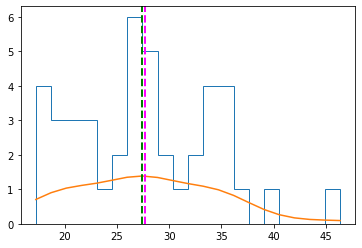

In [52]:
density = stats.gaussian_kde(T_NO2)
n, x, _ = plt.hist(T_NO2, histtype='step', bins=20)  
plt.plot(x, density(x)*3**3)
plt.axvline(T_NO2.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(T_NO2.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

1. Mayoritas kumpulan data berada pada tengah-tengah histogram, merepresentasikan bahwa data terindikasi terdistribusi normal 
2. Mean lebih besar > median, mencirikan right-skewed namun dengan jarak yang sangat berdekatan artinya dapat juga terindikasi normal distribusion
3. Histogram diatas menggambarkan terkait kepadatan/density data dimana terdapat sedikit gaps antara data yang terlihat pada histogram diatas

**Jika dilihat berdasarkan informasi diatas, terindikasi dapat berupa right-skew karena nilai mean yang lebih besar dari nilai median namun dapat juga terindikasi normal-distribution, dikarenakan nilai antara median dan meannya tidak jauh berbeda**

**Melihat nilai skew dan kurtosis**

arithmetic_mean_average skewness: 0.40806625079156356
arithmetic_mean_average kurtosis: -0.08196501186333593


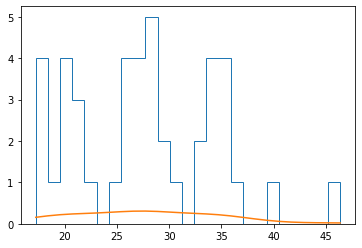

In [53]:
print(T_NO2.name + ' skewness: ' + str(T_NO2.skew()))
print(T_NO2.name + ' kurtosis: ' + str(T_NO2.kurt()))
density = stats.gaussian_kde(T_NO2)
n, x, _ = plt.hist(T_NO2, histtype='step', bins=25)  
plt.plot(x, density(x)*6)
plt.show()
print('\n')

berdasarkan hasil diatas didapatkan bahwa **arithmetic_mean skewness: 0.40806625079156356 menunjukan data tersebut terdistribusi normal dan jika dilihat berdasarkan nilai kurtosis: -0.08**, menunjukan data tersebut simetris dimana nilainya <3

**Jika Berdasarkan analisa menggunakan nilai skewness dan kurtosis, data pada parameter Nitrogen dioxide (NO2) menunjukan terdistribusi normal dikarenakan nilai skewenessnya yang berada pada rentang -0.5 dan 0.5**

**Visualisasi Sebaran Data**

<AxesSubplot:title={'center':'Nitrogen dioxide (NO2) Distribution Data'}, xlabel='arithmetic_mean_average', ylabel='Density'>

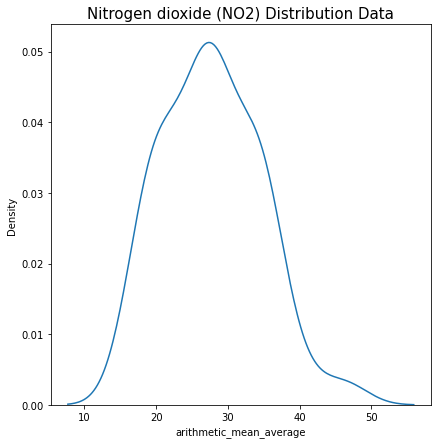

In [54]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Nitrogen dioxide (NO2) Distribution Data", fontsize=15)
sns.kdeplot(data = Tendency['arithmetic_mean_average'])

**Berdasarkan Visualisasi data diatas menggambarkan terdistribusi normal**

count    43.000000
mean     27.731785
std       6.751237
min      17.243241
25%      21.783457
50%      27.431418
75%      33.432649
max      46.359240
Name: arithmetic_mean_average, dtype: float64

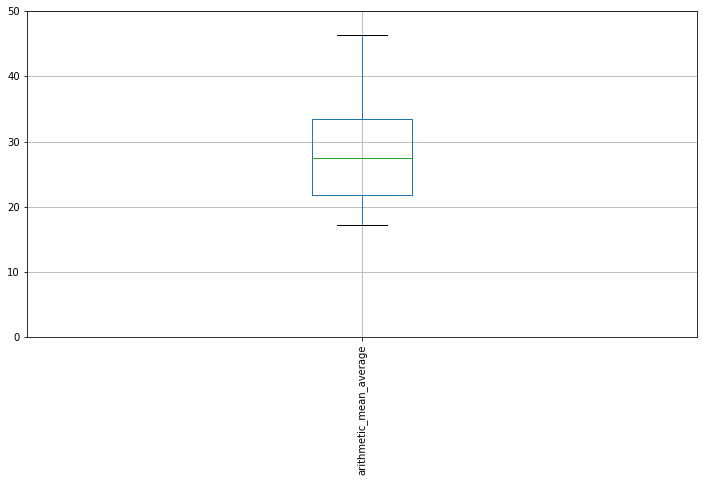

In [55]:
# Plot a box-whisker chart
ax3 = Tendency.boxplot(column='arithmetic_mean_average', figsize=(12, 6))
ax3.set_ylim(0,50);
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90);
Tendency['arithmetic_mean_average'].describe() 

**Berdasarkan Visualisasi Box Plot , tidak terdapat outlier pada data tersebut sehingga tidak perlu dilakukan penghilangan outlier pada data tersebut, dikarenakan distribusinya normal**

## **Hypothesis Testing**

Pada bagian ini akan dilakukan uji hipotesis untuk mengetahui **apakah penurunan/perubahan Kualitas Udara dengan parameter Nitrogen dioxide (NO2) yang terjadi setelah pasca covid merupakan penurunan tertinggi di State Illinois dan memiliki perbedaan signifikan dengan Nilai Kualitas Udara dengan rata-rata rentang periode 42 tahun terakhir (1980-2022)** menggunakan two sample t-test dengan significant threshold sebesar 0.05.

Karena negara bagian Illinois merupakan salah satu negara bagian dengan tingkat Kualitas Udara Tertinggi Pencemarannya maka terutama pada Kualitas Udara terkait Nitrogen dioxide (NO2) maka hipotesisnya adalah :

**H0: μ == 27.73178493317029 (Periode Keseluruhan)** Penurunan tidak signifikan
**H1: μ != 27.73178493317029**  Penurunan signifikan


Membuat populasi dari Parameter **Nitrogen dioxide (NO2) Setelah Covid** dan Parameter **Nitrogen dioxide (NO2) Sebelum Covid** sebanyak **1000** baris data.

In [56]:
data_clean = Tendency['arithmetic_mean_average']

In [57]:
t_stats, p_value = stats.ttest_1samp(data_clean, 0.359827)
p_value

6.697254555317157e-28

Didapatkan p-value sejumlah 6.697254555317157e-28, dimana p-value < 0.05 maka H0 ditolak. Berdasarkan hasil tersebut menunjukan bahwa terdapat perbedaan signifikan antara penurunan Nitrogen dioxide (NO2) setelah covid dibandingkan dengan historical rata-rata periode keseluruhan 1980-2022

## **Kesimpulan**

What is the current air quality in Illinois ?

How polluted is Illinois?

Why is there unhealthy air quality in Illinois ?

What chemicals are in Illinois air?

What is Illinois doing to improve air quality?

1. Kondisi Nilai Kualitas Udara di Illinois cukup tergolong tinggi (Kualitas udara rendah) jika dilihat dibandingkan dengan keseluruhan negara bagian diamerika serikat terutama yang terjadi pencemaran udara jenis PM.2.5, PM.10 dan NO2, jika dilihat berdasarkan indeks levelnya nilai rata-rata dalam kurun waktu 42 tahun terakhir yang senilai 27 PPB (Parts per billion) atau 0,027 PPM (Parts Per million) masih tergolong aman, dan jika dibandingkan dengan nilai rata-rata pasca kejadian covid - hingga saat ini telah terjadi penurunan yang sangat signifikan menjadi 18.2 atau setara dengan 0,018 yang mengindikasikan bahwa, kualitas udara di states Illinois mengalami kenaikan tingkat kualitas menjadi lebih baik.
2. PM.2.5, PM.10 dan NO2 adalah salah satu polusi terbesar di Negara Bagian Illinois
3. Kondisi Jumlah Kendaraan yang semakin meningkat dan juga tidak terlepas dari aktivitas kawasan perkotaan mengakibatkan meningkatnya polusi didaerah tersebut yang berakibat pada menurunya kualitas udara di Negara Bagian Illinois
4. Terdapat 6 Jenis Paramater Udara di Illinois yang diteliti pada kasus ini yaitu PM2.5 - Local Conditions' ,'PM10 Total 0-10um STP' , 'Nitrogen dioxide (NO2)' , 'Ozone' ,'Carbon monoxide, dan Sulfur Dioxide
5. Nitrogen dioksida (NO2) adalah senyawa kimia oksigen dan nitrogen yang terbentuk dari hasil pembakaran pada suhu tinggi, terutama pembakaran bahan bakar, seperti minyak bumi, solar, gas, dan bahan organik. NOx juga merupakan gas yang bertanggung jawab atas kabut asap dan awan coklat yang meliputi kota-kota besar dan menghasilkan kualitas udara yang buruk.
Jika melihat pada penyebab NO2, maka terdapat keterkaitan antara penyebab peningkatan dan penurunan NO2 tersebut pada Kejadian covid, dimana Kejadian Covid-19 dapat menurunkan polusi dinegara bagian tersebut, hal tersebut menunjukan bahwa, dengan menurunnya aktivitas perkotaan termasuk penurun kegiatan pergerakan transportasi dan aktivitas perkotaan dengan skala besar dapat menekan angka polusi dinegara tersebut, oleh karena perlu diatur dalam suatu regulasi dimana terdapat pembatasan aktivitas pergerakan terutama pada kawasan perkotaan yang mengakibatkan pergerakan yang tinggi serta pada kawasan-kawasan industri disekitarnya. hal ini tidak terlapas dari pengaruh pembakaran bahan bakar akibat penggunaan transportasi yang secara massif dapat meningkatnya polusi NO2 tersebut, dan ketika penggunaan transportasi ataupun pergerakan aktivitas manusia dibatasi, polusi tersebut tertekan secara signfikan, hal tersebut dijadikan dasar bahwa, perlu adanya pembatasan atau efektifas dalam penggunaan transportasi yaitu melalui penggunaan transportasi massal, sehingga senyawa kimia yang dihasilkan oleh pembakaran bahan bakar tersebut lebih sedikit, jika dibandingkan dengan dampak penggunaan akumulatif transportasi pribadi. 